<a href="https://colab.research.google.com/github/anki079/CAP4630_AI_Fall2019/blob/master/HW2/HW_2_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ankita Tripathi

CAP4630 Fall 2019

Homework 2 Problem 2

Note: the solution to this assignment uses code from the colab notebooks provided by Dr Wocjan for the class. This assignment uses code from the following notebook:

Classifying MNIST fashion items with dense layers and analyzing model performance: https://colab.research.google.com/drive/1TTO7P5GTmsHhIt_YGqZYyw4KGBCnjqyW

# MNIST fashion data set

## Loading the MNIST fashion data set

In [0]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Exploring the format of the MNIST fashion data set

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
train_images.ndim

3

In [0]:
train_images.dtype

dtype('uint8')

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
len(train_labels)

60000

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

NameError: ignored

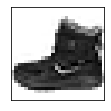

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

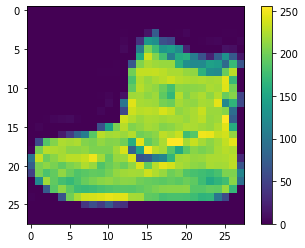

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Preprocessing the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Pretty good model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 20
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,batch_size = 5000, 
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 1s 19us/sample - loss: 1.4987 - acc: 0.5265 - val_loss: 0.8609 - val_acc: 0.6894
Epoch 2/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.7113 - acc: 0.7445 - val_loss: 0.6508 - val_acc: 0.7657
Epoch 3/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.5661 - acc: 0.8036 - val_loss: 0.5508 - val_acc: 0.8107
Epoch 4/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4924 - acc: 0.8287 - val_loss: 0.4942 - val_acc: 0.8266
Epoch 5/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4626 - acc: 0.8379 - val_loss: 0.4736 - val_acc: 0.8307
Epoch 6/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4290 - acc: 0.8495 - val_loss: 0.4484 - val_acc: 0.8394
Epoch 7/20
60000/60000 [==============================] - 0s 6us/sample - loss: 0.4031 - acc: 0.8583 - val_loss: 0.4290 -

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 66us/sample - loss: 0.3423 - acc: 0.8766
Test accuracy: 0.8766


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

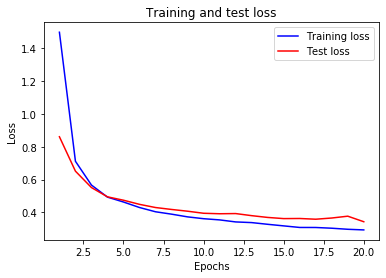

In [0]:
plt.plot(epochs_range, loss_values, 'b', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

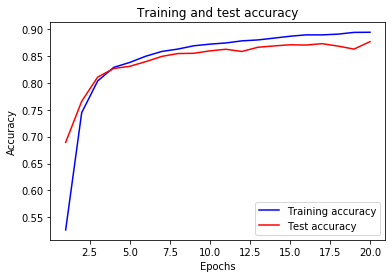

In [0]:
plt.plot(epochs_range, acc_values, 'b', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Overfitting model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 15
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,batch_size = 1000,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 1s 24us/sample - loss: 0.7595 - acc: 0.7469 - val_loss: 0.5076 - val_acc: 0.8256
Epoch 2/15
60000/60000 [==============================] - 0s 8us/sample - loss: 0.4391 - acc: 0.8469 - val_loss: 0.4389 - val_acc: 0.8441
Epoch 3/15
60000/60000 [==============================] - 0s 8us/sample - loss: 0.3991 - acc: 0.8594 - val_loss: 0.4100 - val_acc: 0.8572
Epoch 4/15
60000/60000 [==============================] - 0s 8us/sample - loss: 0.3582 - acc: 0.8718 - val_loss: 0.3891 - val_acc: 0.8632
Epoch 5/15
60000/60000 [==============================] - 0s 8us/sample - loss: 0.3369 - acc: 0.8786 - val_loss: 0.3793 - val_acc: 0.8677
Epoch 6/15
60000/60000 [==============================] - 0s 8us/sample - loss: 0.3185 - acc: 0.8842 - val_loss: 0.3727 - val_acc: 0.8676
Epoch 7/15
60000/60000 [==============================] - 0s 7us/sample - loss: 0.3076 - acc: 0.8880 - val_loss: 0.3467 -

## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.3255 - acc: 0.8840
Test accuracy: 0.884


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

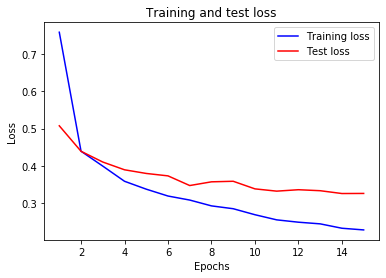

In [0]:
plt.plot(epochs_range, loss_values, 'b', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

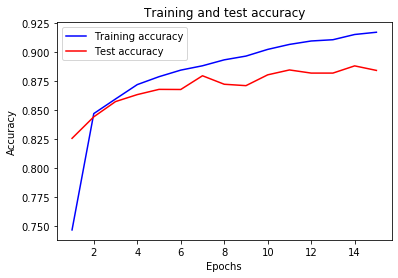

In [0]:
plt.plot(epochs_range, acc_values, 'b', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Underfitting model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# compile the model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# train the model
epochs = 3
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs, batch_size = 1000,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 1s 10us/sample - loss: 1.8739 - acc: 0.3746 - val_loss: 1.5454 - val_acc: 0.5605
Epoch 2/3
60000/60000 [==============================] - 0s 6us/sample - loss: 1.2978 - acc: 0.6363 - val_loss: 1.0850 - val_acc: 0.6705
Epoch 3/3
60000/60000 [==============================] - 0s 6us/sample - loss: 0.9322 - acc: 0.7017 - val_loss: 0.8306 - val_acc: 0.7184


## Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 49us/sample - loss: 0.8306 - acc: 0.7184
Test accuracy: 0.7184


## Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

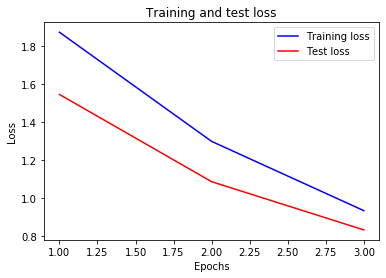

In [0]:
plt.plot(epochs_range, loss_values, 'b', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'r', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

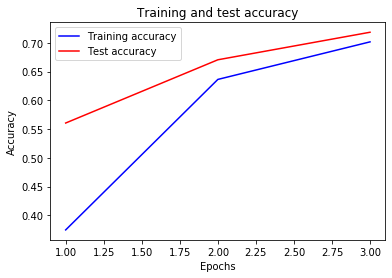

In [0]:
plt.plot(epochs_range, acc_values, 'b', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'r', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()